# Kmeans Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()

In [9]:
x=sc.fit_transform(df)

In [10]:
km=KMeans()
y=km.fit_predict(x)
y

array([1, 6, 2, 7, 5, 5, 0, 4, 2, 1, 0, 3, 2, 4, 3, 4, 7, 1, 3, 2, 0, 2,
       0, 1, 4, 7, 0, 5, 3, 4, 2, 2, 1, 3, 4, 4, 4, 0, 0, 1, 3, 1, 2, 0,
       3, 4, 4, 3, 0, 7])

### Visualizing the data frame

In [11]:
df['cluster']=y
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,6
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,7
4,9.0,276,91,40.6,5
5,7.9,204,78,38.7,5
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,4
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


#### Elbow Graph

In [12]:
wcss=[]

In [14]:
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
    

C:\Users\psaro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.071170568930896,
 44.27774553168494,
 40.91218124858684,
 35.36697054489926,
 33.01592352692286,
 26.881541874962842,
 24.71158570402369,
 22.352118786024253,
 20.735769339419633,
 19.896402957070364,
 18.604676039402133,
 17.173077581677337,
 15.327330496740217,
 13.749242658003611,
 13.435210886461213,
 12.684777540772792]

Text(0, 0.5, 'wcss value')

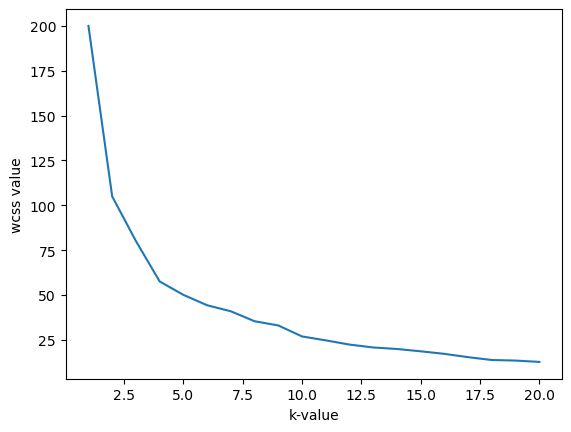

In [16]:
plt.plot(range(1,21),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss value')

In [17]:
# from the above elbow graph we can draw 4 cluster as the elbow graph edge curve is near to 4

## Final Model

In [18]:
km=KMeans(n_clusters=4)
y=km.fit_predict(x)
y

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [19]:
df['cluster']=y

In [20]:
data=pd.DataFrame(x,columns=['Murder','Assault','UrbanPop','Rape'])

In [21]:
data['cluster']=y

In [22]:
km.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [23]:
data.head(2)

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,1


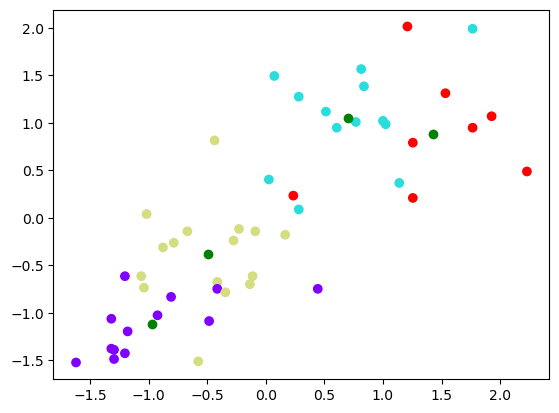

In [24]:
plt.scatter(data['Murder'],data['Assault'],c=data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='green')

### Evaluation of KMeans

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(x,y)

0.33968891433344395

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

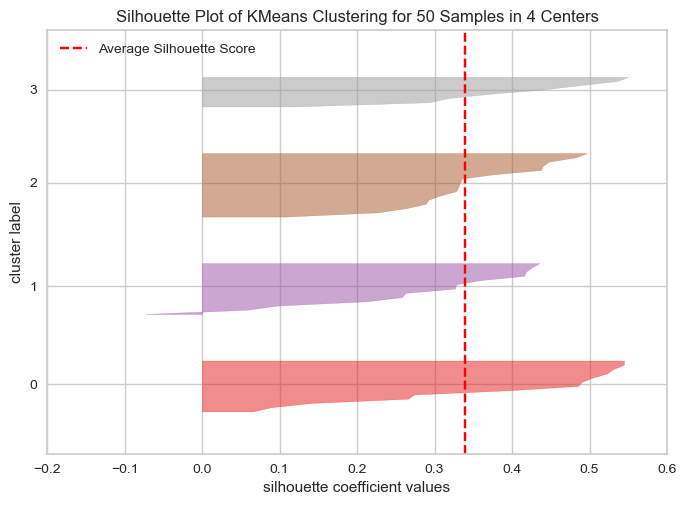

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
model=KMeans(n_clusters=4)
vis=SilhouetteVisualizer(model)
vis.fit(x)
vis.show()